In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import pickle
from sklearn import metrics


##Importing Data

In [44]:
features = pd.read_csv("/content/Train_Features.csv")
features.head()

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,0,0,3,0,0,2,2,1,5,17.08,...,0.02,18,0.29,11.63,59.79,3,15,3,7,7
1,1,1,1,0,0,1,1,1,8,28.00,...,0.03,21,0.33,14.00,84.00,10,11,10,6,14
2,2,0,1,0,0,1,1,1,0,7.74,...,0.00,5,0.67,0.97,11.61,2,3,2,3,2
3,3,0,1,0,2,1,1,1,4,6.67,...,0.01,10,0.22,7.50,30.00,3,7,2,6,8
4,4,2,3,1,3,2,2,1,14,30.86,...,0.05,36,0.21,37.33,144.00,12,24,9,7,22


In [45]:
test_data = pd.read_csv("/content/Test_Features.csv")


In [46]:
output = pd.read_csv("/content/Train_Output.csv")
output.head()

,Index,Defect
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0


## EDA

In [50]:
features.describe()

,Index,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,837.500000,1.801313,4.766706,0.124702,0.939141,2.887232,2.594869,1.701074,14.931384,21.696814,...,0.088216,51.071599,0.318461,301.096223,266.368329,19.255370,31.816229,9.770883,7.754773,20.713007
std,483.963842,3.791021,7.998350,0.690636,3.144651,4.001469,3.494295,2.240634,25.118051,21.920083,...,0.178662,86.028837,0.315008,1001.372829,535.124561,32.964592,53.323039,12.485216,5.747950,30.808052
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,418.750000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.800000,...,0.000000,4.750000,0.080000,0.670000,9.500000,1.000000,3.000000,1.000000,3.000000,4.000000
50%,837.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,14.565000,...,0.020000,17.000000,0.200000,12.710000,59.500000,6.000000,10.000000,5.000000,6.000000,9.000000
75%,1256.250000,2.000000,5.000000,0.000000,0.000000,3.000000,3.000000,1.000000,17.000000,30.090000,...,0.090000,58.000000,0.500000,127.090000,267.795000,22.000000,36.000000,14.000000,11.000000,24.000000
max,1675.000000,35.000000,89.000000,12.000000,44.000000,45.000000,45.000000,26.000000,262.000000,193.060000,...,2.640000,1106.000000,2.000000,18044.640000,7918.820000,428.000000,678.000000,120.000000,37.000000,288.000000


In [155]:
features.isnull().sum()

Index                    0
LOC_BLANK                0
BRANCH_COUNT             0
LOC_CODE_AND_COMMENT     0
LOC_COMMENTS             0
CYCLOMATIC_COMPLEXITY    0
DESIGN_COMPLEXITY        0
ESSENTIAL_COMPLEXITY     0
LOC_EXECUTABLE           0
HALSTEAD_CONTENT         0
HALSTEAD_DIFFICULTY      0
HALSTEAD_EFFORT          0
HALSTEAD_ERROR_EST       0
HALSTEAD_LENGTH          0
HALSTEAD_LEVEL           0
HALSTEAD_PROG_TIME       0
HALSTEAD_VOLUME          0
NUM_OPERANDS             0
NUM_OPERATORS            0
NUM_UNIQUE_OPERANDS      0
NUM_UNIQUE_OPERATORS     0
LOC_TOTAL                0
dtype: int64

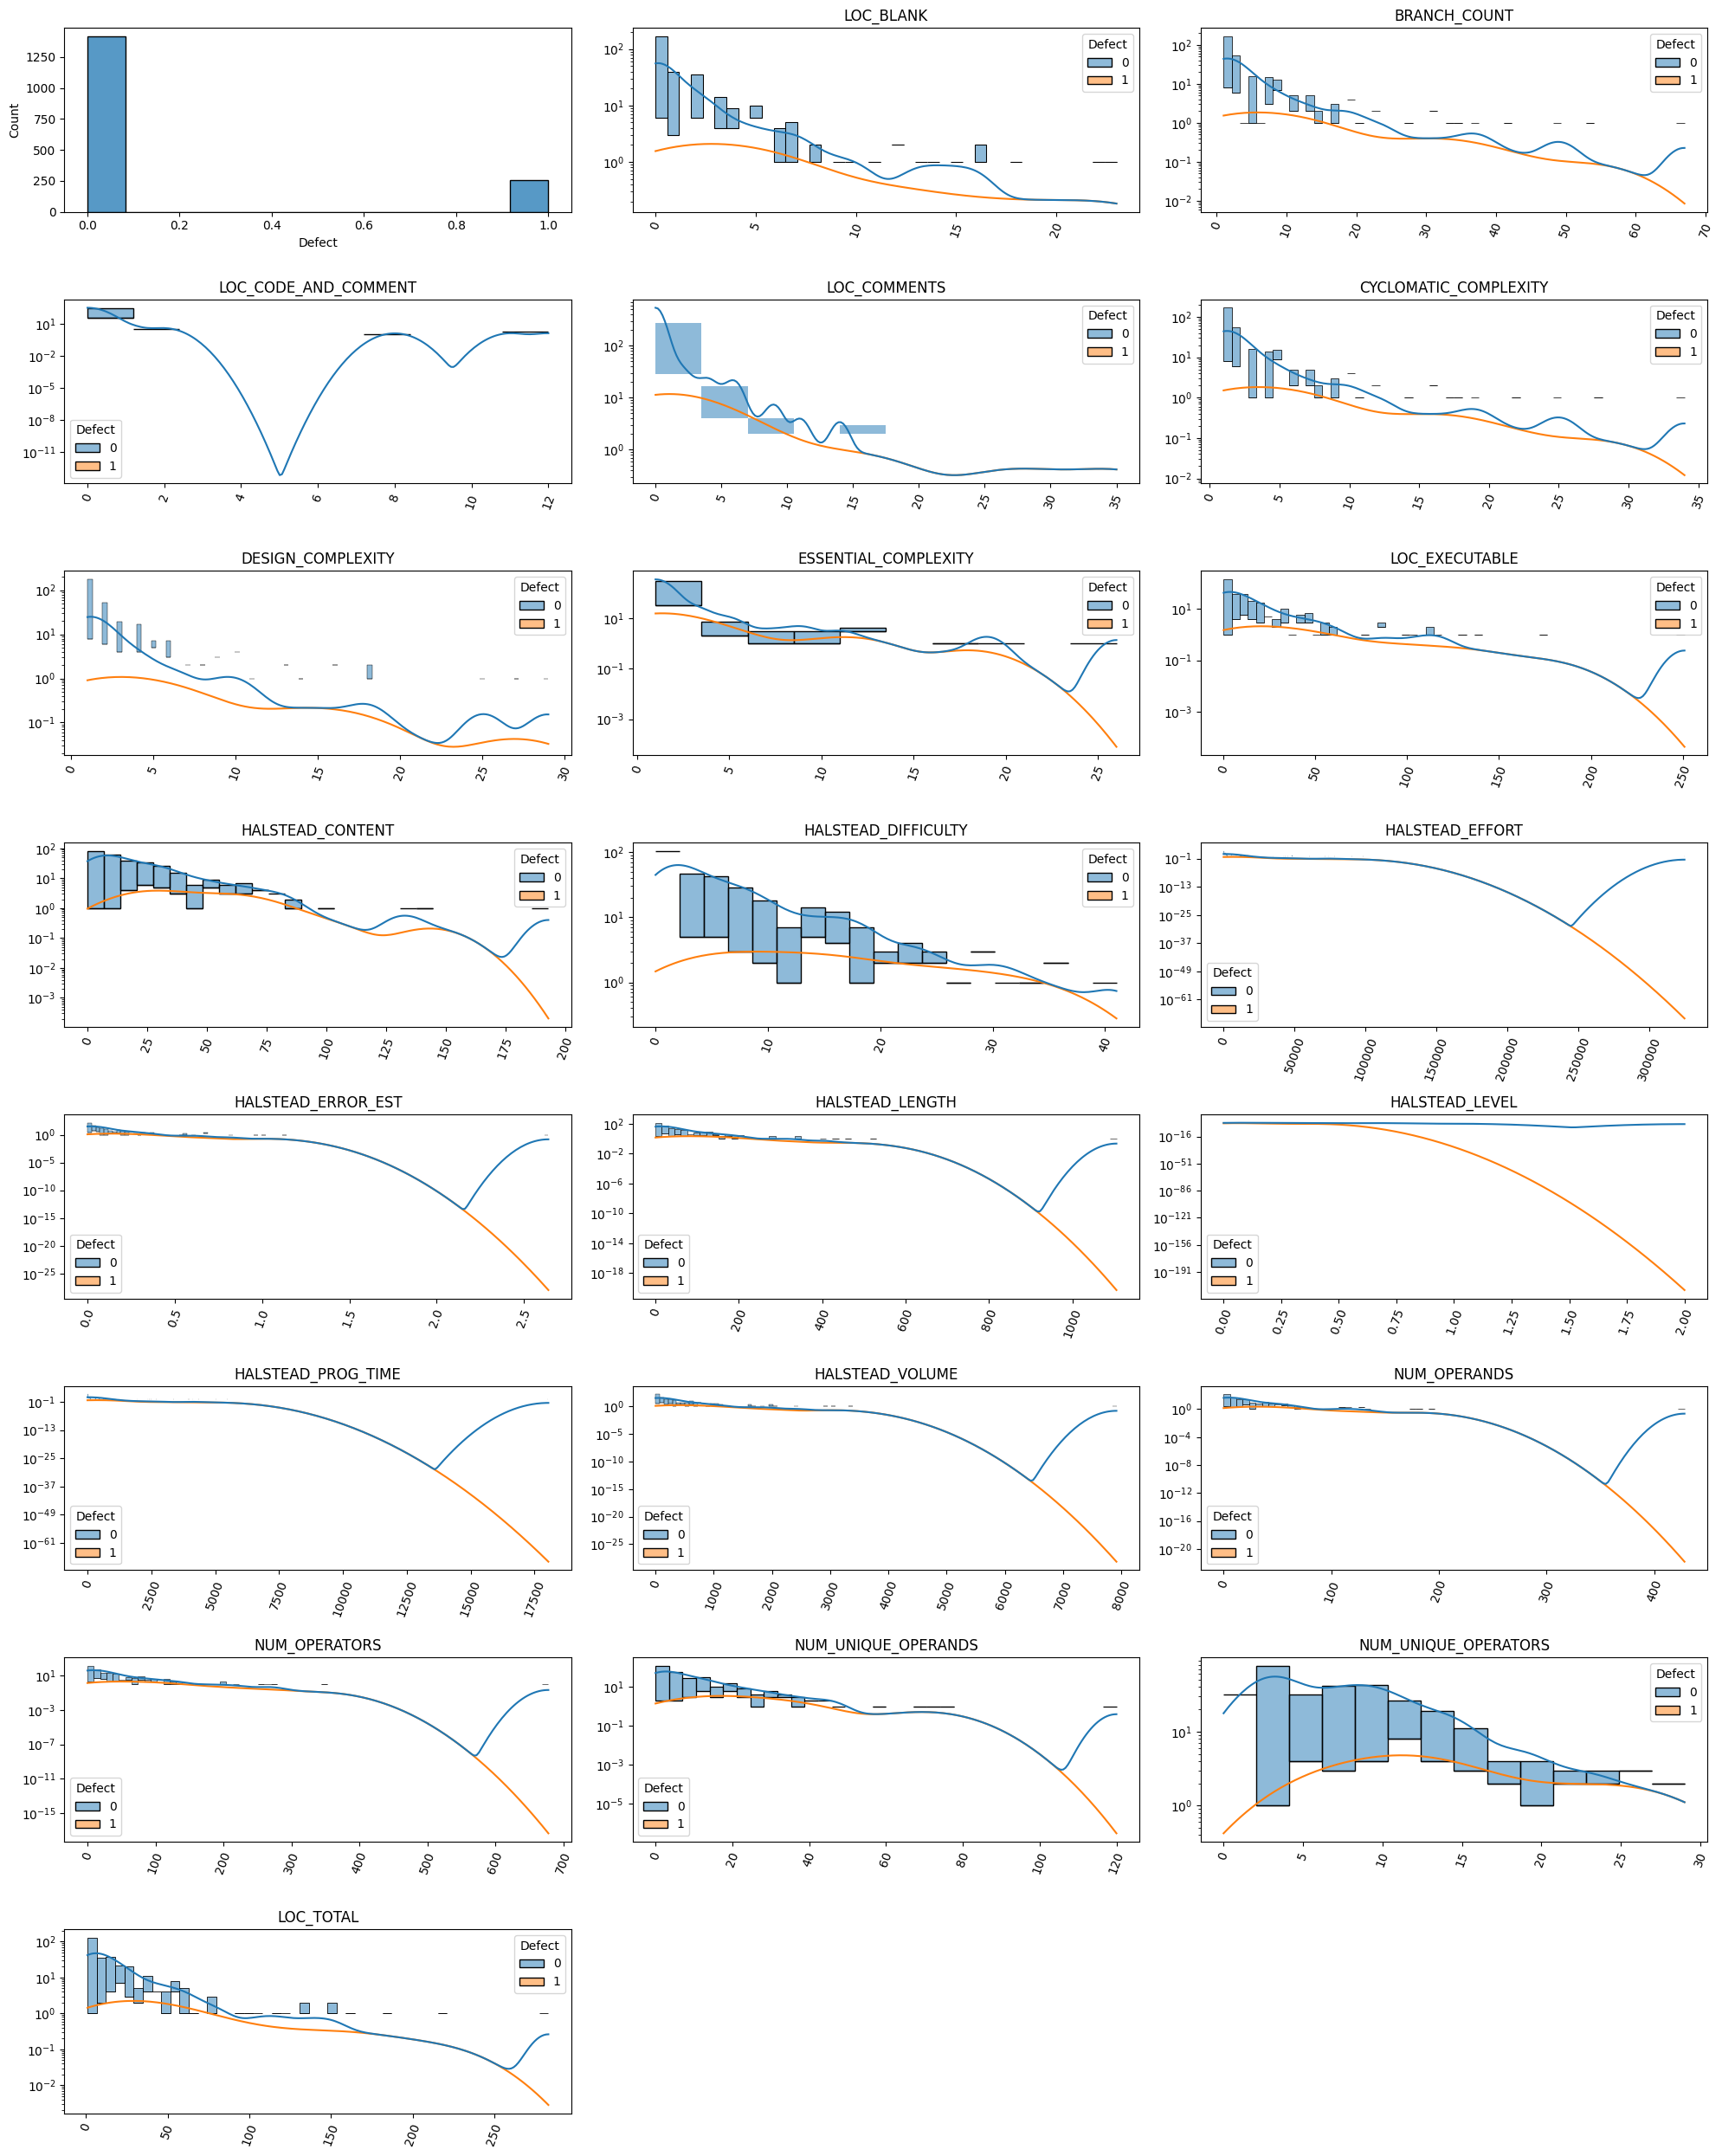

In [9]:
plt.figure(figsize=(20,25))

discrete_columns = features.columns

plt.subplot(8,3,1)
sns.histplot(data=features, x=output['Defect'])
for i, column in enumerate(discrete_columns):
    if column!='Index' and column!='Defect':
        plt.subplot(8,3, i+1)
        sns.histplot(data=features[0:300],x=column,hue=output['Defect'],multiple="stack",log_scale=(False, True), kde=True)
        plt.title(column)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=70)


plt.tight_layout()
plt.show()

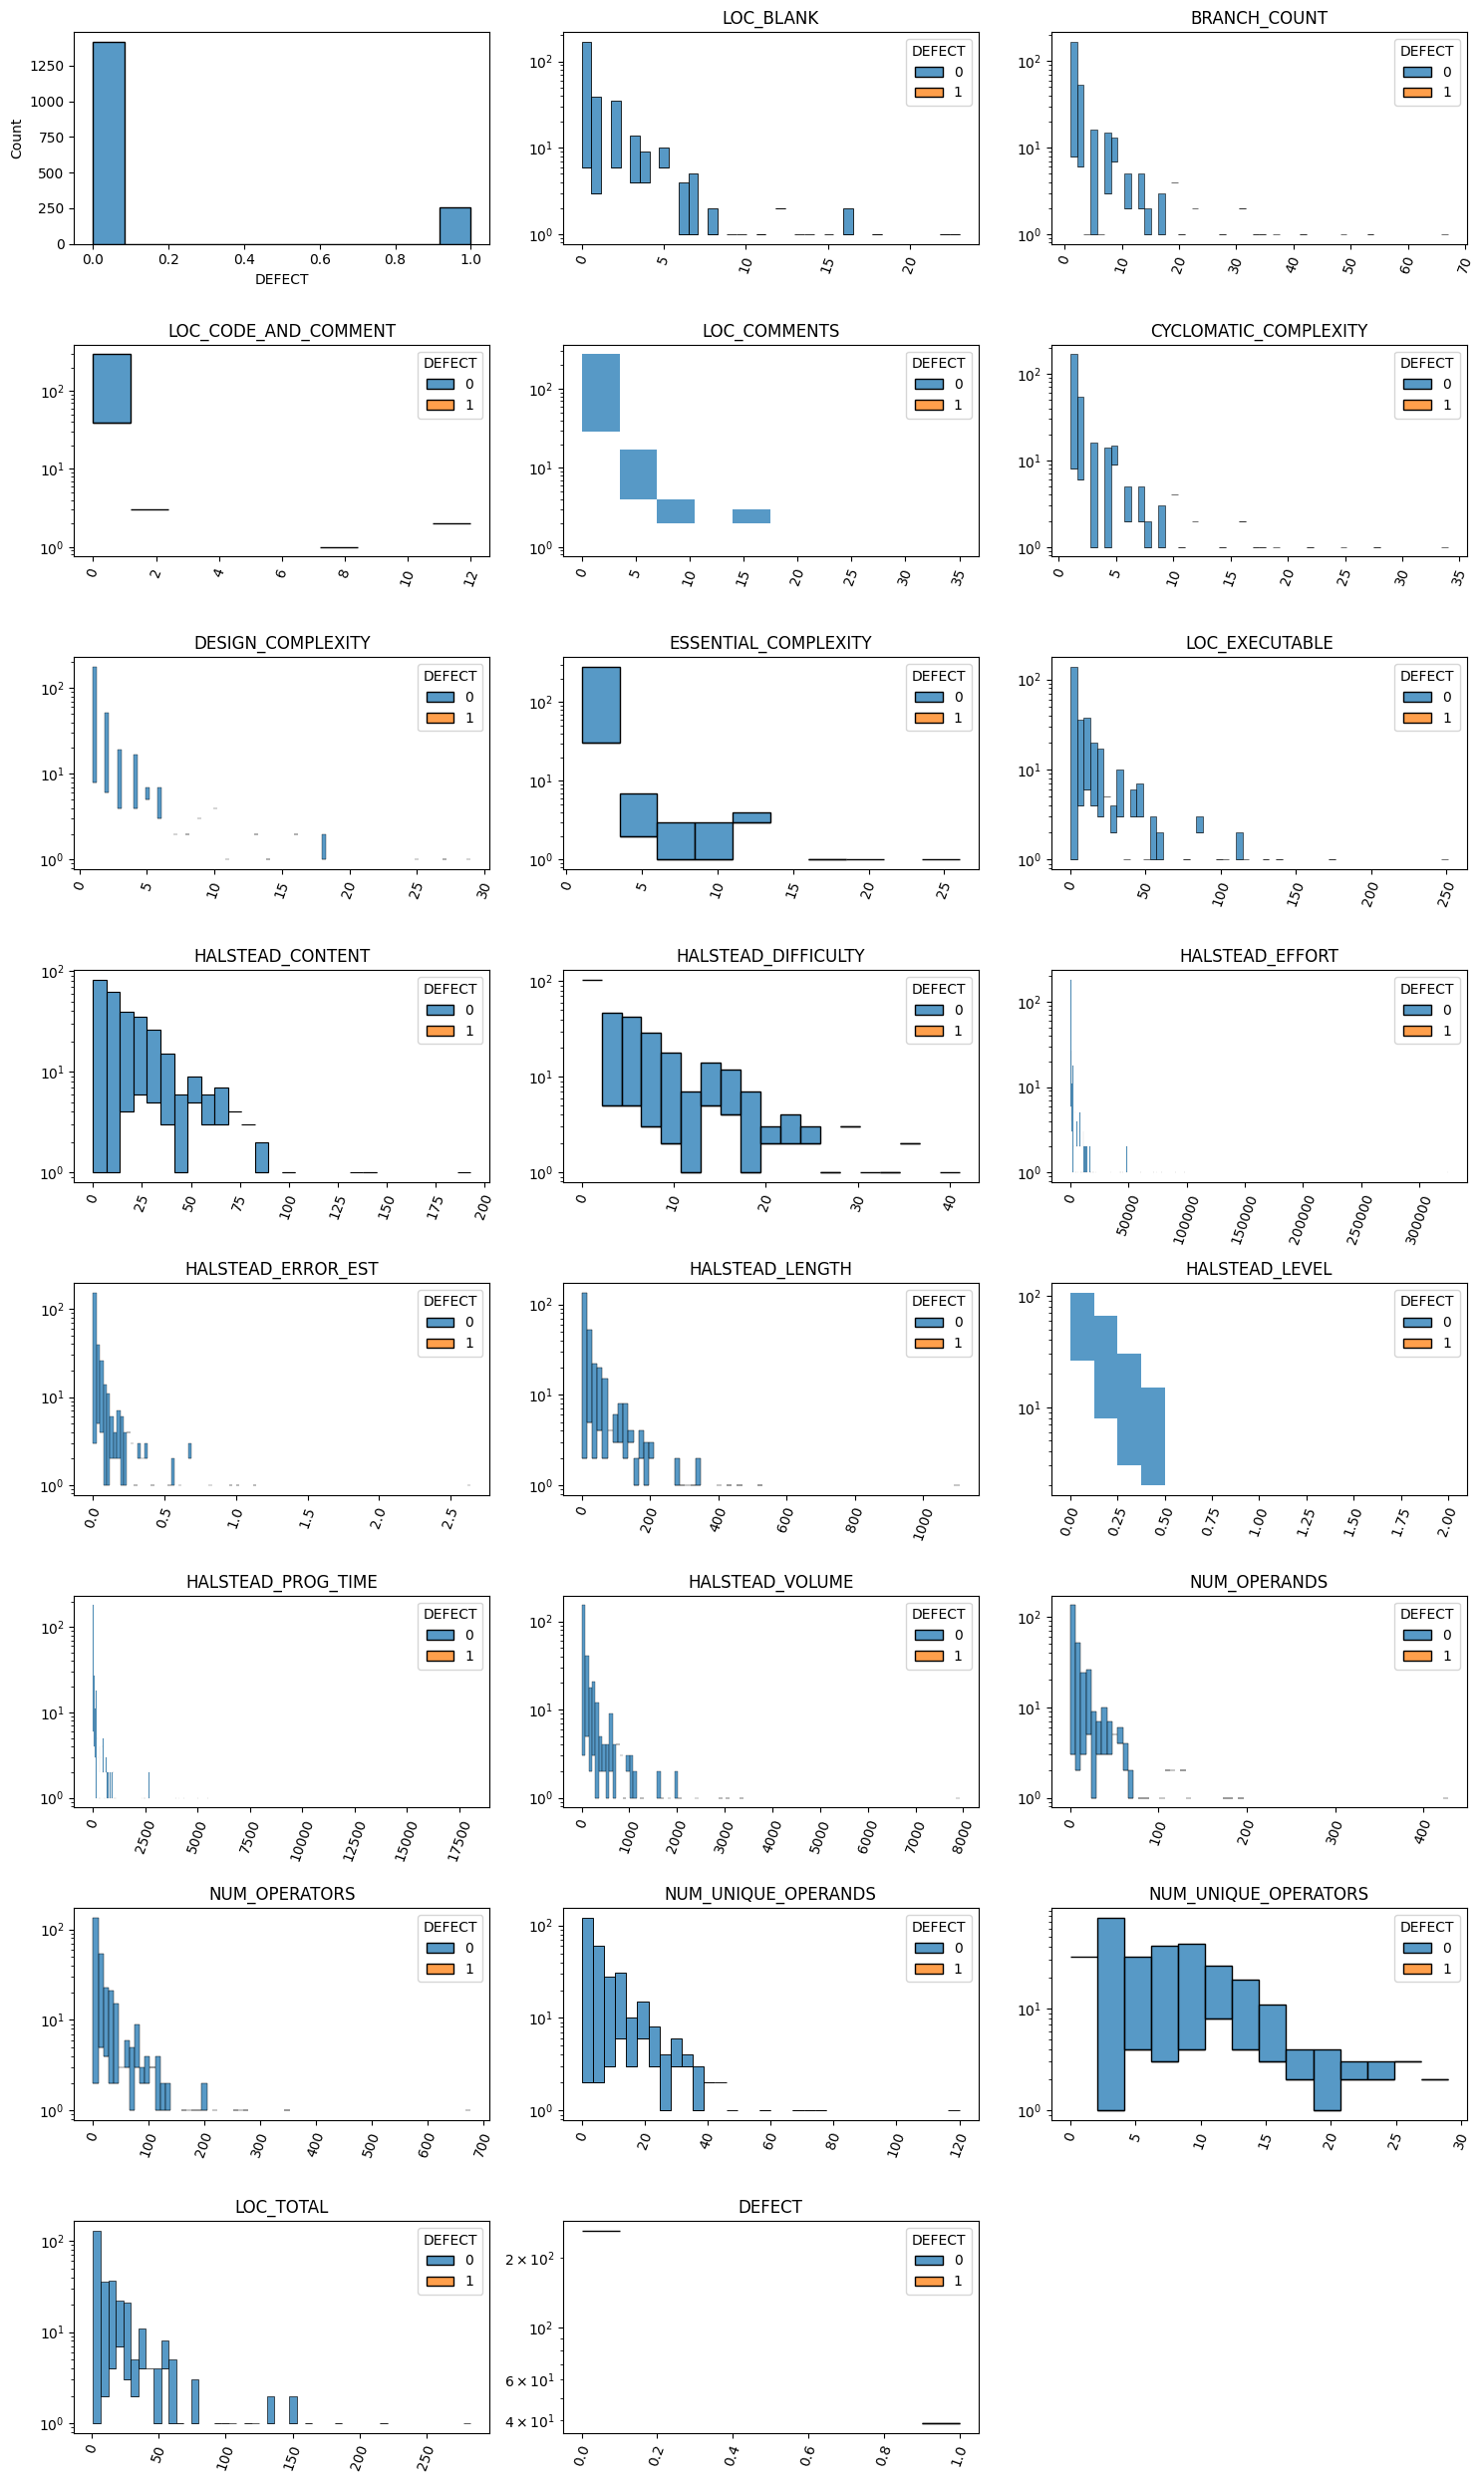

In [37]:
plt.figure(figsize=(15,25))

discrete_columns = features.columns

plt.subplot(8,3,1)
sns.histplot(data=features, x='DEFECT')
for i, column in enumerate(discrete_columns):
    if column!='Index' and column!='Defect':
        plt.subplot(8,3, i+1)
        sns.histplot(data=features[0:300],x=column,hue='Defect',multiple="stack",log_scale=(False, True))
        plt.title(column)
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=70)


plt.tight_layout()
plt.show()


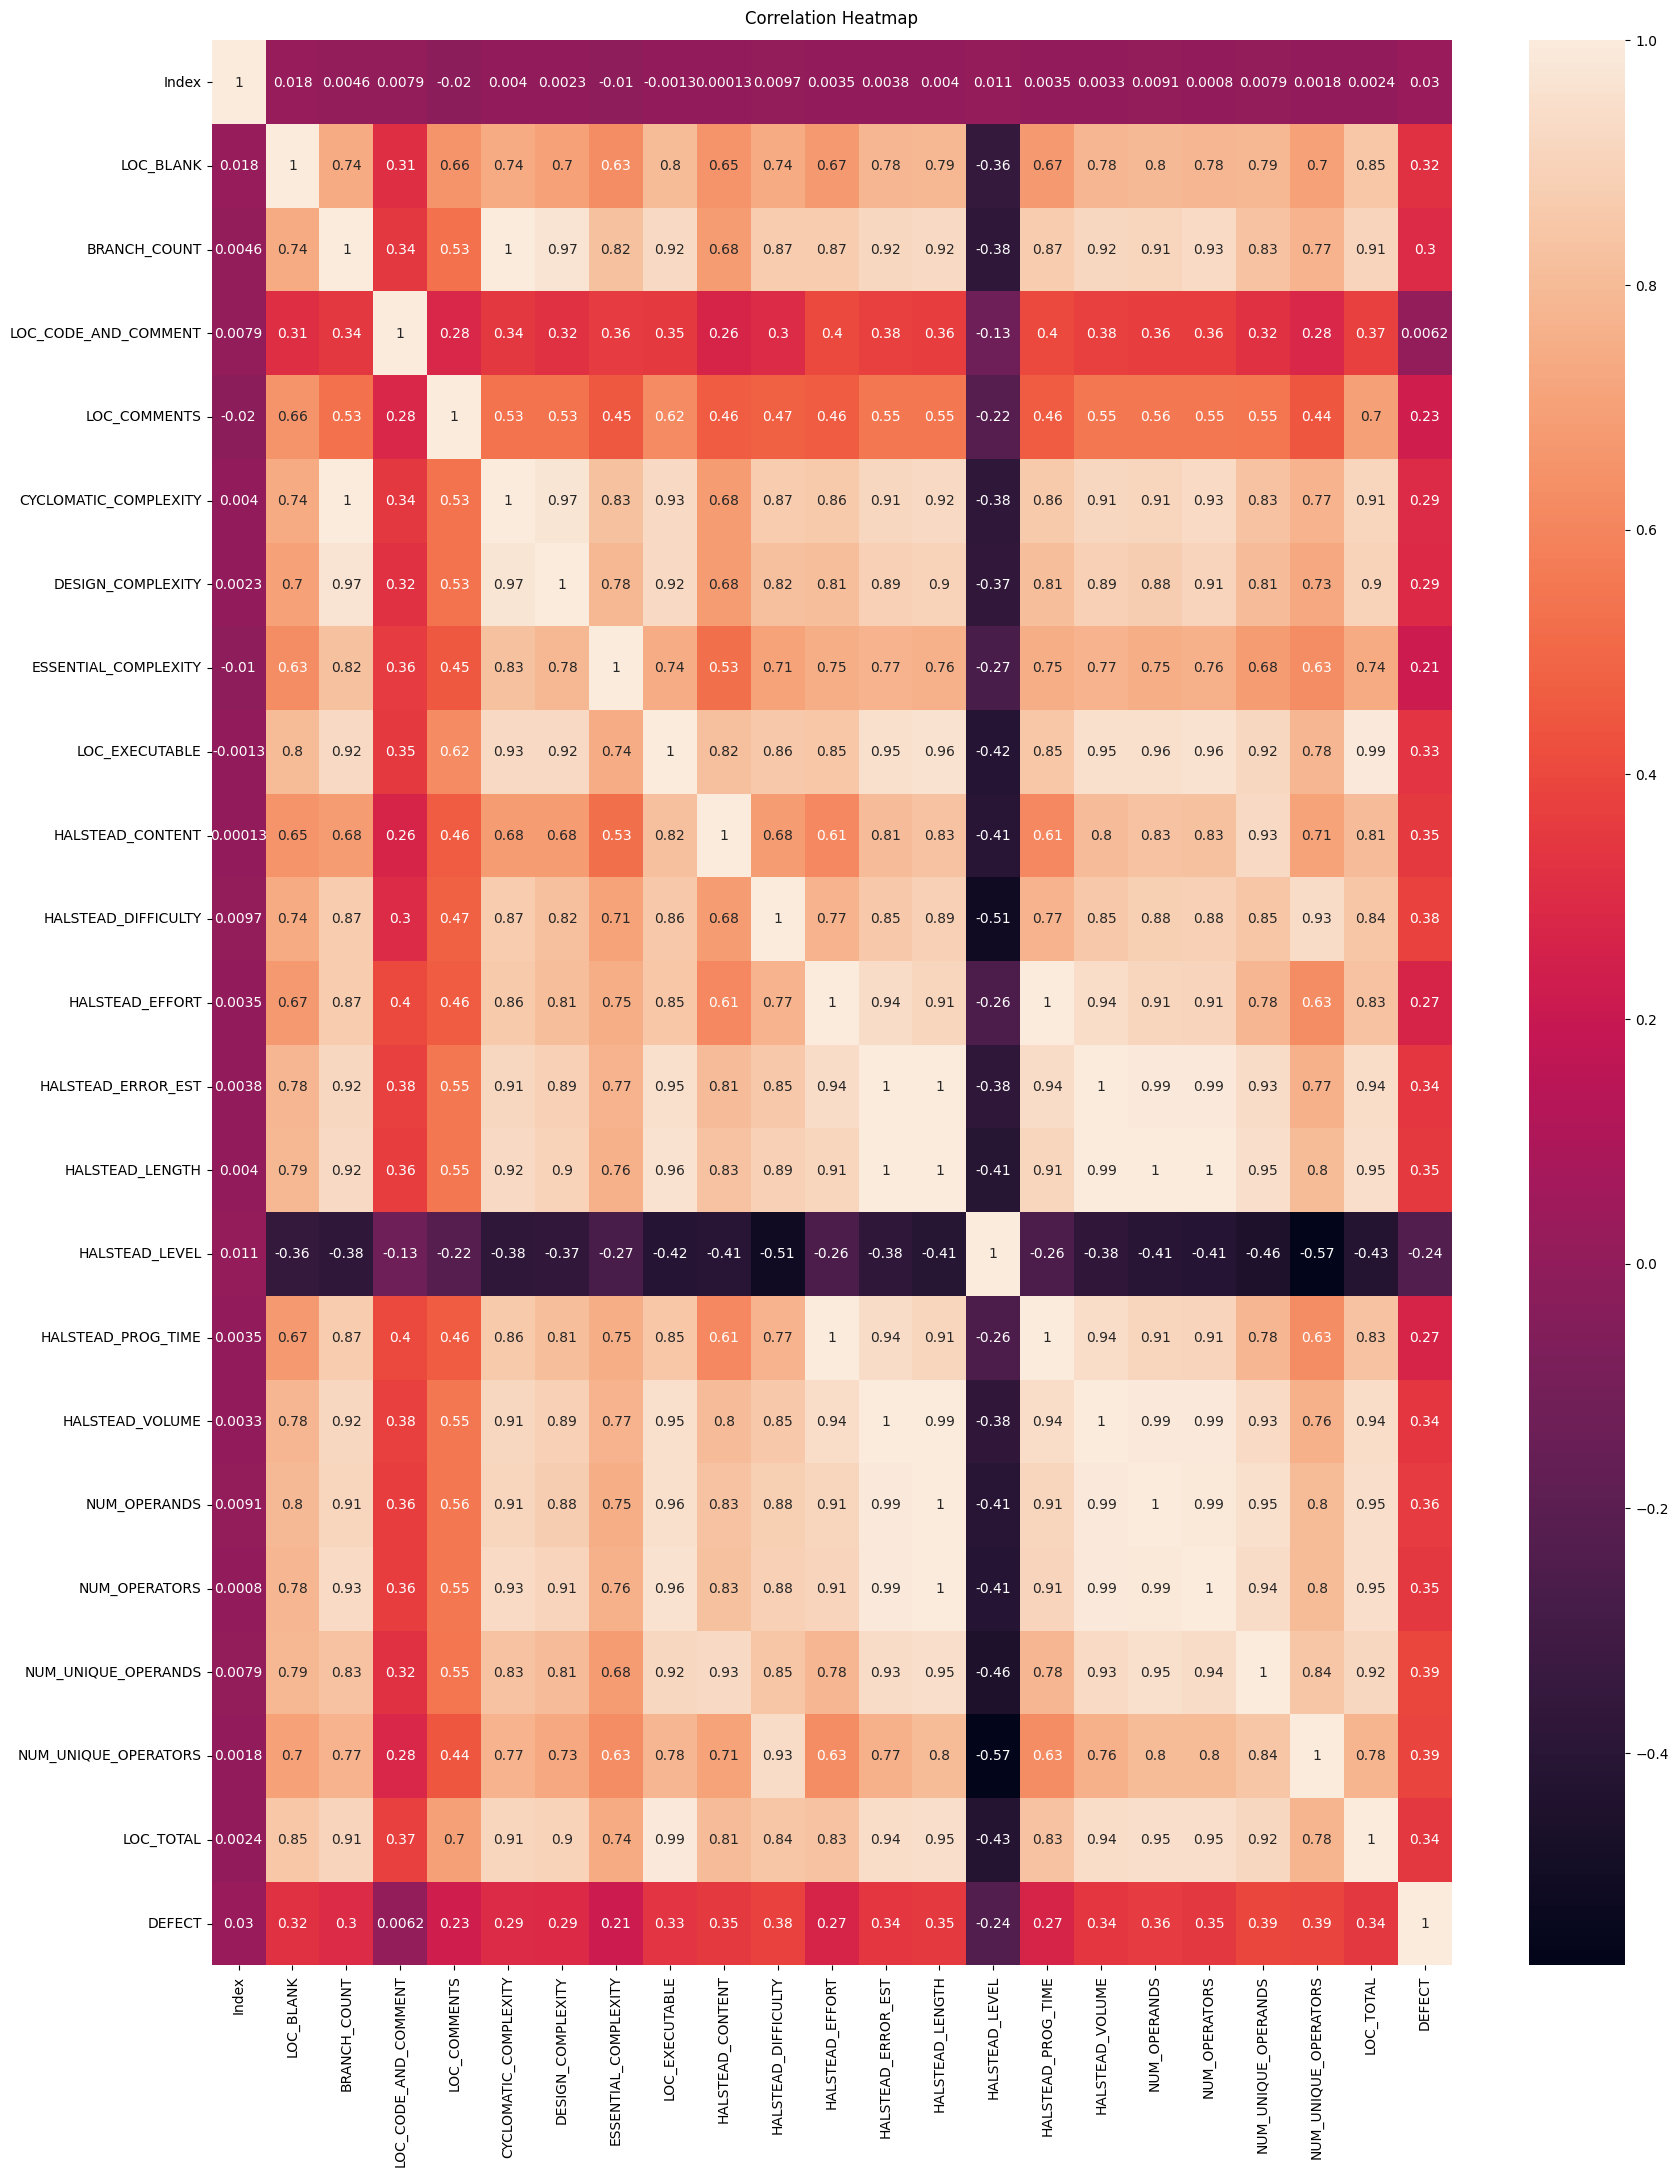

In [28]:
plt.figure (figsize=(15,15))
heatmap = sns.heatmap(features.corr(), annot=True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':12}, pad=12);

In [47]:
y = output['Defect']
X = features.drop(columns=['Index'])
X_test = test_data.drop(columns=['Index', ])

## Feature Engineering

### Log transformation

In [48]:
from math import log
for column in features.columns:
    if column != 'Index' and column != 'Defect':
        X[column]=X[column].apply(lambda x: log(x+1))
        X_test [column] = X_test[column].apply(lambda x: log(x+1))


In [24]:
X.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
0,0.000000,1.386294,0.000000,0.000000,1.098612,1.098612,0.693147,1.791759,2.894806,1.504077,...,0.019803,2.944439,0.254642,2.536075,4.107425,1.386294,2.772589,1.386294,2.079442,2.079442
1,0.693147,0.693147,0.000000,0.000000,0.693147,0.693147,0.693147,2.197225,3.367296,1.386294,...,0.029559,3.091042,0.285179,2.708050,4.442651,2.397895,2.484907,2.397895,1.945910,2.708050
2,0.000000,0.693147,0.000000,0.000000,0.693147,0.693147,0.693147,0.000000,2.167910,0.916291,...,0.000000,1.791759,0.512824,0.678034,2.534490,1.098612,1.386294,1.098612,1.386294,1.098612
3,0.000000,0.693147,0.000000,1.098612,0.693147,0.693147,0.693147,1.609438,2.037317,1.704748,...,0.009950,2.397895,0.198851,2.140066,3.433987,1.386294,2.079442,1.098612,1.945910,2.197225
4,1.098612,1.386294,0.693147,1.386294,1.098612,1.098612,0.693147,2.708050,3.461351,1.735189,...,0.048790,3.610918,0.190620,3.646233,4.976734,2.564949,3.218876,2.302585,2.079442,3.135494


### Standardizing Dataset

In [49]:
scaler = StandardScaler()
x_trans = scaler.fit_transform(X)
x_test_trans =scaler.fit_transform(X_test)

In [40]:
x_trans

array([[-7.34354139e-01,  1.19615940e-01, -2.28466846e-01, ...,
        -4.00316713e-01,  1.89209693e-01, -2.88144495e-01],
       [ 1.21121738e-01, -7.10593012e-01, -2.28466846e-01, ...,
         5.42050012e-01, -1.56034822e-03,  2.65963114e-01],
       [-7.34354139e-01, -7.10593012e-01, -2.28466846e-01, ...,
        -6.68309761e-01, -8.01057192e-01, -1.15272843e+00],
       ...,
       [ 3.42153141e+00,  2.53294254e+00,  5.05135220e+00, ...,
         1.79012991e+00,  1.63443650e+00,  2.20277839e+00],
       [-7.34354139e-01, -7.10593012e-01, -2.28466846e-01, ...,
        -1.04602475e+00, -8.01057192e-01, -7.02444525e-01],
       [-7.34354139e-01, -7.10593012e-01, -2.28466846e-01, ...,
         6.23106311e-01,  7.68478687e-01,  1.39822207e-01]])

### Balancing Data

In [11]:
def rebalance_classes(X: pd.DataFrame, y: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    sm = SMOTE()
    X_balanced, y_balanced = sm.fit_resample(X, y)
    return X_balanced, y_balanced

### Feature Selection

In [58]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
# model2 = ExtraTreesClassifier()
# model2.fit(x_trans, y)

ExtraTreesClassifier()

In [59]:
print(model.feature_importances_)
# print(model2.feature_importances_)

[0.04915856 0.03696277 0.01569228 0.03857905 0.03596301 0.03503167
 0.02155141 0.06947606 0.0526242  0.05028781 0.0580969  0.04046244
 0.05193284 0.04073328 0.05338339 0.04824313 0.05466896 0.05496913
 0.05980496 0.05165272 0.08072543]


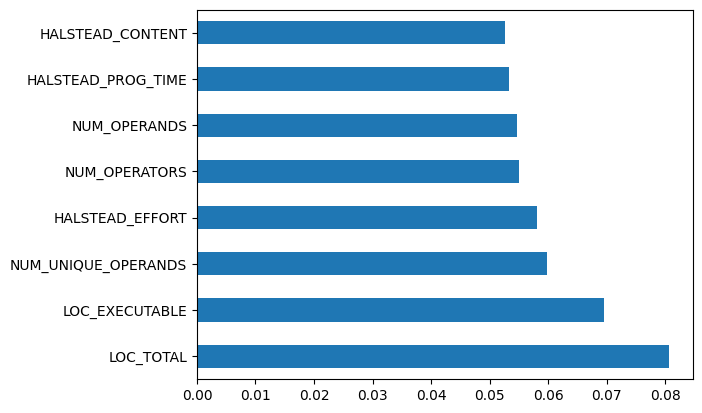

In [63]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(8).plot(kind='barh')
plt.show()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x_trans,y,stratify=y,test_size=0.2)

## Building Model

### Random Forest

In [35]:
random_forest_model = RandomForestClassifier(n_estimators=1000,max_depth=40)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, n_estimators=1000)

In [64]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
    # Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
    # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
    # Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
bootstrap = [True, False]  # Create the random grid




In [66]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


#### Feature importance

In [40]:
rf = RandomForestClassifier()
rf_random_cv= RandomizedSearchCV
rf.fit(X_train, y_train)

feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

#### Hyperparameters Optimization RandomSearchCV

In [69]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth =[int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]



params = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

In [70]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=params,
                        n_iter=10, cv=3,random_state=42, n_jobs=-1)



In [ ]:
rf_random.fit(X_train, y_train)


In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions = rf_random.fit(X_test)

In [ ]:
sns.distplot(y_test-predictions)

## Model Evaluation

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Pickle file Model Packaging

In [ ]:
file = open ('random_forest_model.pkl', 'wb')
pickle.dump(rf_random, file)

### Ensemble Model

In [17]:
random_forest_model = RandomForestClassifier(n_estimators=1000,max_depth=40)
logistic_model = LogisticRegression()
svc_model = SVC()

In [18]:
voting_clf = VotingClassifier(estimators=[('lr', logistic_model), ('rf', random_forest_model), ('svc', svc_model )], voting='hard')
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(max_depth=40,
                                                     n_estimators=1000)),
                             ('svc', SVC())])

In [169]:
for clf in (logistic_model, random_forest_model, svc_model, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
  print(clf.__class__.__name__, roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test) )

LogisticRegression 0.8511904761904762
LogisticRegression 0.550650054171181 0.02976190476190476 0.15476190476190477
RandomForestClassifier 0.8511904761904762
RandomForestClassifier 0.5820693391115926 0.05357142857142857 0.15476190476190477
SVC 0.8482142857142857
SVC 0.5174702058504875 0.008928571428571428 0.15476190476190477
VotingClassifier 0.8511904761904762
VotingClassifier 0.542795232936078 0.023809523809523808 0.15476190476190477


In [24]:
y_preds = random_forest_model.predict(X_test)
roc_auc_score(y_test,y_pred),np.mean(y_pred),np.mean(y_test)
print("The accuracy of the Modesl is:\t", accuracy_score(y_test, y_pred))
print(classification_report(y_preds, y_test))

The accuracy of the Modesl is:	 0.8541666666666666
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       311
           1       0.27      0.56      0.36        25

    accuracy                           0.85       336
   macro avg       0.62      0.72      0.64       336
weighted avg       0.91      0.85      0.88       336

